In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('bankmarketingcamp.csv')

In [2]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [5]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Before removing Outliers


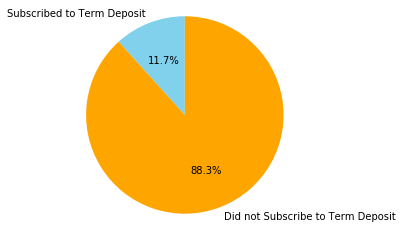

In [6]:
import matplotlib.pyplot as plt
color = '#81d1ec','#ffa500'
labels = 'Subscribed to Term Deposit', 'Did not Subscribe to Term Deposit'
sizes = [5289, 39922]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print("Before removing Outliers")
fig1, ax1 = plt.subplots()
ax1.pie( sizes, labels=labels,colors=color, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Text(0.5, 0, 'Frequency')

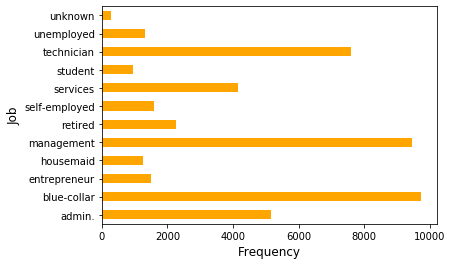

In [7]:
data['job'].value_counts().sort_index().plot.barh(color="#ffa500")
plt.ylabel("Job", fontsize=12)
plt.xlabel("Frequency", fontsize=12)

Text(0, 0.5, 'Frequency')

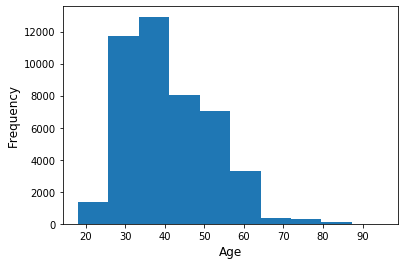

In [8]:
data['age'].plot.hist()
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0, 0.5, 'Frequency')

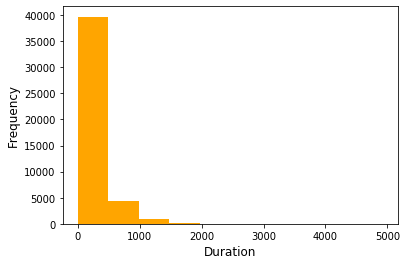

In [9]:
data['duration'].plot.hist(color="#ffa500")
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Frequency',fontsize=12)

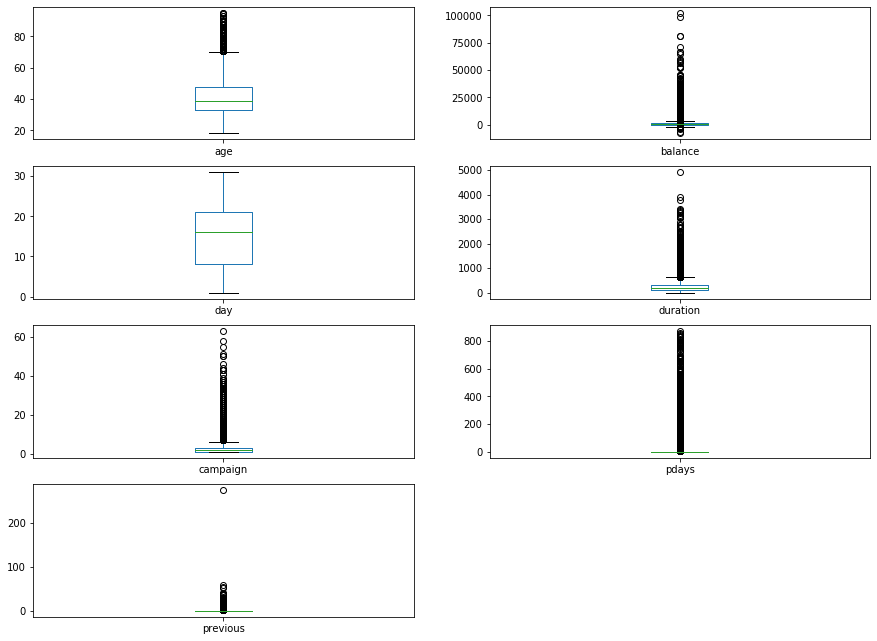

In [10]:
data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [11]:
X = data.drop(['y'], axis = 1) 
Y = data['y'] 
print(X.shape) 
print(Y.shape) 

(45211, 16)
(45211,)


In [12]:
data_age_zscore = (X['age'] - X['age'].mean())/X['age'].std()

In [13]:
print(np.where(data_age_zscore > 2))

(array([28906, 29158, 29261, 29263, 29297, 29322, 29324, 29368, 29382,
       29385, 29464, 29508, 29513, 29610, 29865, 29961, 30176, 30225,
       30264, 30488, 30591, 30627, 30641, 30696, 30907, 30908, 31018,
       31032, 31051, 31052, 31055, 31057, 31062, 31066, 31069, 31072,
       31074, 31077, 31087, 31089, 31094, 31099, 31101, 31103, 31108,
       31114, 31116, 31119, 31125, 31130, 31145, 31149, 31151, 31183,
       31188, 31189, 31221, 31233, 31249, 31255, 31261, 31272, 31285,
       31298, 31316, 31322, 31323, 31324, 31332, 31341, 31349, 31365,
       31383, 31393, 31395, 31414, 31428, 31447, 31482, 31527, 31531,
       31566, 31569, 31621, 31647, 31671, 31674, 31723, 31771, 31795,
       31799, 31816, 31919, 32009, 32032, 32041, 32048, 32051, 32062,
       32064, 32068, 32074, 32089, 32099, 32105, 32110, 32153, 32160,
       32183, 32204, 32211, 32321, 32447, 32451, 32532, 32689, 32699,
       32802, 32962, 33017, 33257, 33262, 33360, 33414, 33447, 33455,
       33479, 33698

In [14]:
data_z = X[(data_age_zscore < 2)]


In [15]:
Y_z = Y[(data_age_zscore < 2)]


In [16]:
df1=pd.DataFrame(data_z)
df2=pd.DataFrame(Y_z)
data_1 = pd.concat([df1, df2], axis=1)

In [17]:
data_1['y'].value_counts()

no     39367
yes     4883
Name: y, dtype: int64

After removing Outliers


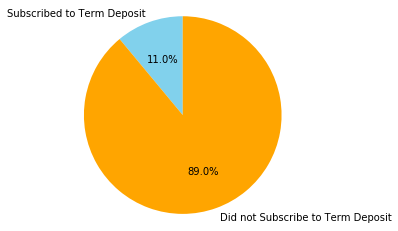

In [18]:
import matplotlib.pyplot as plt
color = '#81d1ec','#ffa500'
labels = 'Subscribed to Term Deposit', 'Did not Subscribe to Term Deposit'
sizes = [4883, 39367]
print("After removing Outliers")
fig1, ax1 = plt.subplots()
ax1.pie( sizes, labels=labels,colors=color, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal') 
plt.show()

In [19]:
X_1 = data_1.drop(['y'], axis = 1) 
Y_1 = data_1['y'] 
print(X_1.shape) 
print(Y_1.shape) 

(44250, 16)
(44250,)


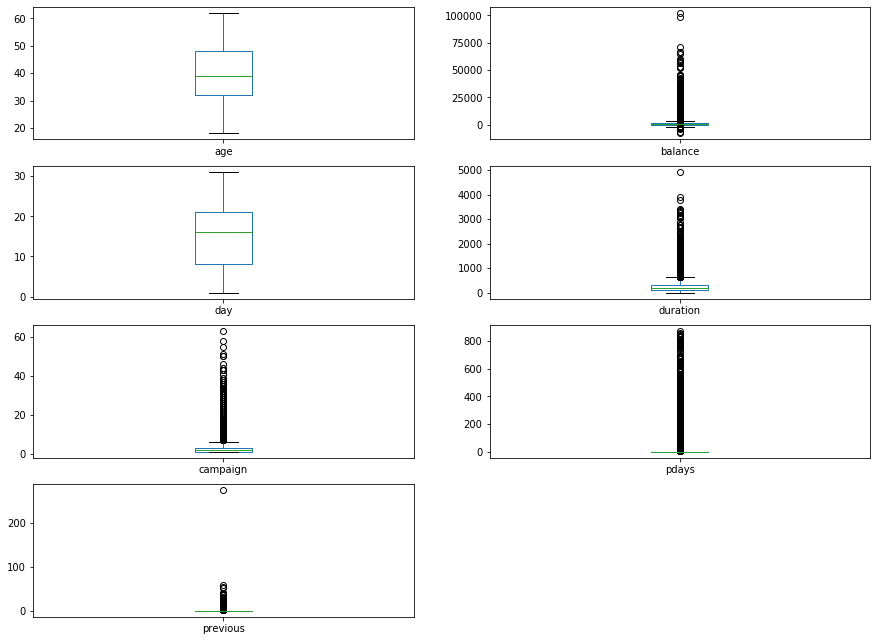

In [20]:
data_1.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

Text(0.5, 1.0, 'After Removing Outliers')

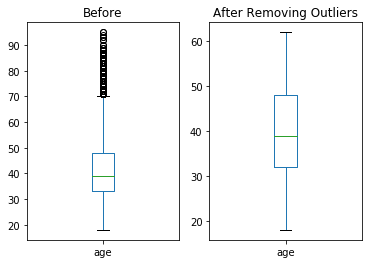

In [21]:
plt.subplot(1,2,1)
data['age'].plot(kind="box");
plt.title('Before')
plt.subplot(1,2,2)
data_1['age'].plot(kind="box");
plt.title('After Removing Outliers')

In [22]:
from sklearn.preprocessing import LabelEncoder
data_en = data_1.apply(LabelEncoder().fit_transform)
data_en

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3034,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,5,8,2,2,0,1029,0,0,0,16,9,266,0,0,0,3,1
45205,7,9,2,1,0,1421,0,1,0,16,9,386,1,0,0,3,1
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [23]:
X_en = data_en.drop(['y'], axis = 1) 
Y_en = data_en['y'] 
print(X_1.shape) 
print(Y_1.shape) 

(44250, 16)
(44250,)


In [24]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


xx = data_en.iloc[:,:-1]
yy = data_en.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(xx,yy,test_size=0.25)

# summarize class distribution
print("Before oversampling: ",Counter(Y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_sm, Y_train_sm = SMOTE.fit_resample(X_train, Y_train)

# summarize class distribution
print("After oversampling: ",Counter(Y_train_sm))



Before oversampling:  Counter({0: 29493, 1: 3694})
After oversampling:  Counter({0: 29493, 1: 29493})


In [25]:
X_train_sm.shape

(58986, 16)

In [26]:
Y_train_sm.shape

(58986,)

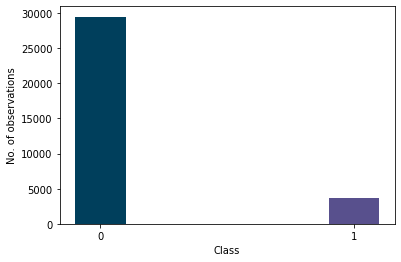

In [45]:
import numpy as np
import matplotlib.pyplot as plt 

data = {'0':29493, '1':3694}
SMOTE = list(data.keys())
values = list(data.values())
  
#fig = plt.figure(figsize = (6, 3))
 
plt.bar(SMOTE, values, color =['#003f5c','#58508d'],
        width = 0.2)
 
plt.xlabel("Class",fontsize=10)
plt.ylabel("No. of observations",fontsize=10)
#plt.title("No. of observations in each class",fontsize=10)
plt.show()

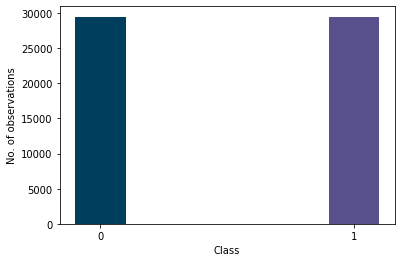

In [46]:
import numpy as np
import matplotlib.pyplot as plt 

data = {'0':29493, '1':29493}
SMOTE = list(data.keys())
values = list(data.values())
  
#fig = plt.figure(figsize = (6, 3))
 
plt.bar(SMOTE, values, color =['#003f5c','#58508d'],
        width = 0.2)
 
plt.xlabel("Class",fontsize=10)
plt.ylabel("No. of observations",fontsize=10)
#plt.title("No. of observations in each class",fontsize=10)
plt.show()

Feature Scores Ranking:
1. Feature 11 (0.270071)
2. Feature 6 (0.124770)
3. Feature 8 (0.093376)
4. Feature 10 (0.075474)
5. Feature 9 (0.062294)
6. Feature 5 (0.056125)
7. Feature 0 (0.052585)
8. Feature 1 (0.050392)
9. Feature 7 (0.047142)
10. Feature 12 (0.043679)
11. Feature 15 (0.035088)
12. Feature 3 (0.028431)
13. Feature 13 (0.023549)
14. Feature 2 (0.020793)
15. Feature 14 (0.013044)
16. Feature 4 (0.003188)


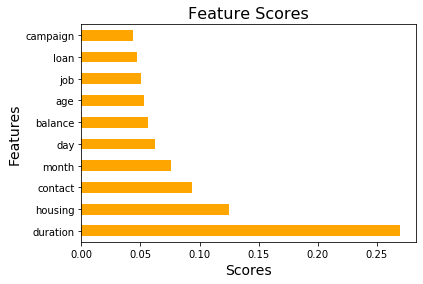

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_sm,Y_train_sm)
importance=model.feature_importances_
indices = np.argsort(importance)[::-1]
print("Feature Scores Ranking:")
for f in range(X_en.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))
feat_importances = pd.Series(model.feature_importances_, index=X_en.columns)
feat_importances.nlargest(10).plot(kind='barh', color='#ffa500')
plt.xlabel("Scores",fontsize='14')
plt.ylabel("Features",fontsize='14')
plt.title("Feature Scores",fontsize='16')
plt.show()

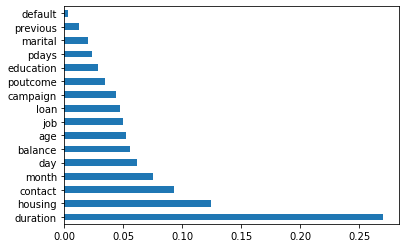

In [28]:
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [29]:
xts=pd.DataFrame(X_train_sm)
yts=pd.DataFrame(Y_train_sm)
data_sm = pd.concat([xts, yts], axis=1)

In [30]:
data_fin=data_sm.drop(['default','previous','pdays','education','poutcome','marital'], axis = 1)

In [31]:
xxt = data_fin.iloc[:,:-1]
yyt = data_fin.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(xxt,yyt,test_size=0.25)

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred=gnb.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7778531226690174


In [33]:
print("Gaussian NB Classifier Results:")
from sklearn.metrics import confusion_matrix
print("Confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(Y_test, Y_pred))
from sklearn.metrics import precision_score
print("Precision score:",precision_score(Y_test, Y_pred))
from sklearn.metrics import recall_score
print("Recall score:",recall_score(Y_test, Y_pred))
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(Y_test, Y_pred))

Gaussian NB Classifier Results:
Confusion matrix: 
[[4627 2738]
 [ 538 6844]]
Accuracy score: 0.7778531226690174
Precision score: 0.7142558964725527
Recall score: 0.927120021674343
F1 Score: 0.8068851685923132


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred=rf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9217467959585001


In [72]:
Y_testt=pd.DataFrame(np.array(Y_test))

In [73]:
Y_testt.shape

(14747, 1)

In [74]:
Y_pred.shape

(14747,)

In [82]:
print("Random Forest model's prediction for class 1")
print('y_test=',Y_testt[0][1])
print('y_pred=',Y_pred[1])
print("\n")
print("Random Forest model's prediction for class 0")
print('y_test=',Y_testt[0][2])
print('y_pred=',Y_pred[2])

Random Forest model's prediction for class 1
y_test= 1
y_pred= 1


Random Forest model's prediction for class 0
y_test= 0
y_pred= 0


In [52]:
print("Random Forest Classifier Results:")
from sklearn.metrics import confusion_matrix
print("Confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(Y_test, Y_pred))
from sklearn.metrics import precision_score
print("Precision score:",precision_score(Y_test, Y_pred))
from sklearn.metrics import recall_score
print("Recall score:",recall_score(Y_test, Y_pred))
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(Y_test, Y_pred))

Random Forest Classifier Results:
Confusion matrix: 
[[6644  721]
 [ 433 6949]]
Accuracy score: 0.9217467959585001
Precision score: 0.9059973924380704
Recall score: 0.9413438092657817
F1 Score: 0.9233324475152804


In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred=xgb.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

C:\Users\harsh\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9186275174611785


In [50]:
print("XGB Classifier Results:")
from sklearn.metrics import confusion_matrix
print("Confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(Y_test, Y_pred))
from sklearn.metrics import precision_score
print("Precision score:",precision_score(Y_test, Y_pred))
from sklearn.metrics import recall_score
print("Recall score:",recall_score(Y_test, Y_pred))
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(Y_test, Y_pred))

XGB Classifier Results:
Confusion matrix: 
[[6661  704]
 [ 496 6886]]
Accuracy score: 0.9186275174611785
Precision score: 0.9072463768115943
Recall score: 0.9328095367109185
F1 Score: 0.9198503873897943


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8197599511765105


In [39]:
print("KNN Classifier Results:")
from sklearn.metrics import confusion_matrix
print("Confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(Y_test, Y_pred))
from sklearn.metrics import precision_score
print("Precision score:",precision_score(Y_test, Y_pred))
from sklearn.metrics import recall_score
print("Recall score:",recall_score(Y_test, Y_pred))
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(Y_test, Y_pred))

KNN Classifier Results:
Confusion matrix: 
[[5349 2016]
 [ 642 6740]]
Accuracy score: 0.8197599511765105
Precision score: 0.7697578803106442
Recall score: 0.9130316987266324
F1 Score: 0.8352955756599332


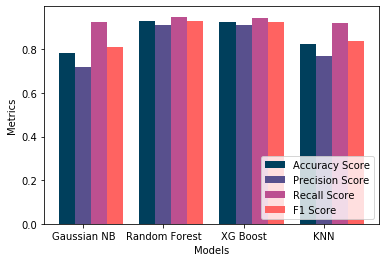

In [40]:
import numpy as np
import matplotlib.pyplot as plt 

N = 4
d = [[0.7813,0.9282,0.9255,0.8231],[0.7185,0.9104,0.9109,0.7708],
  [0.9247,0.9498,0.9432,0.9195],[0.8087,0.9297,0.9268,0.8386]]
ind = np.arange(N)
width = 0.2    
plt.bar(ind, d[0], width, label='Accuracy Score',color='#003f5c')
plt.bar(ind + width, d[1], width,
    label='Precision Score',color='#58508d')
plt.bar(ind + width+width, d[2], width,
    label='Recall Score',color='#bc5090')
plt.bar(ind + width + width+width, d[3], width,
    label='F1 Score',color='#ff6361')
#plt.bar(ind + width + width+width, d[3], width,
 #   label='Recall',color='lightgreen')
plt.xlabel('Models',fontsize=10)

plt.ylabel('Metrics',fontsize=10)
#plt.title('Models vs Metrics',fontsize=15)

plt.xticks(ind + width , ( 'Gaussian NB','Random Forest','XG Boost','KNN'))
plt.legend(loc='lower right')
plt.show()

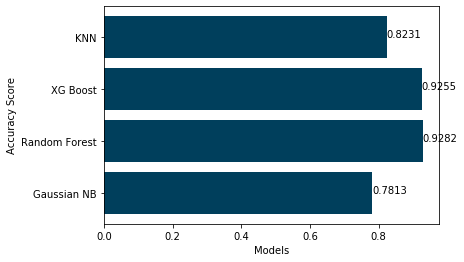

In [41]:
x = ["Gaussian NB", "Random Forest", "XG Boost", "KNN"]
y = [0.7813, 0.9282, 0.9255, 0.8231]
plt.barh(x, y,color='#003f5c')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
for index, value in enumerate(y):
    plt.text(value,index, str(value))

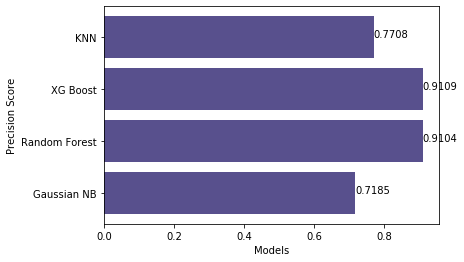

In [42]:
x = ["Gaussian NB", "Random Forest", "XG Boost", "KNN"]
y = [0.7185,0.9104,0.9109,0.7708]
plt.barh(x, y,color='#58508d')
plt.xlabel('Models')
plt.ylabel('Precision Score')
for index, value in enumerate(y):
    plt.text(value,index, str(value))

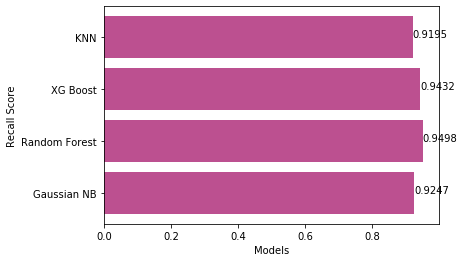

In [43]:
x = ["Gaussian NB", "Random Forest", "XG Boost", "KNN"]
y = [0.9247,0.9498,0.9432,0.9195]
plt.barh(x, y,color='#bc5090')
plt.xlabel('Models')
plt.ylabel('Recall Score')
for index, value in enumerate(y):
    plt.text(value,index, str(value))

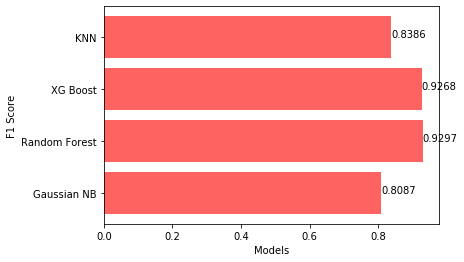

In [44]:
x = ["Gaussian NB", "Random Forest", "XG Boost", "KNN"]
y = [0.8087,0.9297,0.9268,0.8386]
plt.barh(x, y,color='#ff6361')
plt.xlabel('Models')
plt.ylabel('F1 Score')
for index, value in enumerate(y):
    plt.text(value,index, str(value))